In [136]:
# from sklearn import svm,metrics
# from sklearn.neighbors import KNeighborsClassifier # 븐류
# from sklearn.neighbors import KNeighborsRegressor # 회귀- 예측
from sklearn.linear_model import LinearRegression # 선형회귀
from sklearn.preprocessing import PolynomialFeatures # 다항특성을 만들어주는 라이브러리
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib
import glob, os.path, re

matplotlib.rcParams['axes.unicode_minus'] = False  # 마이너스 표시 해결
# 한글설정
matplotlib.rcParams['font.family'] = 'Malgun Gothic' # windows 사용자
# matplotlib.rcParams['font.family'] = 'AppleGothic Gothic'

In [137]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data"

In [138]:
df= pd.read_csv(url)
df

p  x  s  n  t p.1  f  c n.1  k  ... s.2  w w.1 p.2 w.2  o p.3 k.1 s.3  u
0     e  x  s  y  t   a  f  c   b  k  ...   s  w   w   p   w  o   p   n   n  g
1     e  b  s  w  t   l  f  c   b  n  ...   s  w   w   p   w  o   p   n   n  m
2     p  x  y  w  t   p  f  c   n  n  ...   s  w   w   p   w  o   p   k   s  u
3     e  x  s  g  f   n  f  w   b  k  ...   s  w   w   p   w  o   e   n   a  g
4     e  x  y  y  t   a  f  c   b  n  ...   s  w   w   p   w  o   p   k   n  g
...  .. .. .. .. ..  .. .. ..  .. ..  ...  .. ..  ..  ..  .. ..  ..  ..  .. ..
8118  e  k  s  n  f   n  a  c   b  y  ...   s  o   o   p   o  o   p   b   c  l
8119  e  x  s  n  f   n  a  c   b  y  ...   s  o   o   p   n  o   p   b   v  l
8120  e  f  s  n  f   n  a  c   b  n  ...   s  o   o   p   o  o   p   b   c  l
8121  p  k  y  n  f   y  f  c   n  b  ...   k  w   w   p   w  o   e   w   v  l
8122  e  x  s  n  f   n  a  c   b  y  ...   s  o   o   p   o  o   p   o   c  l

[8123 rows x 23 columns]

In [139]:
df.columns

Index(['p', 'x', 's', 'n', 't', 'p.1', 'f', 'c', 'n.1', 'k', 'e', 'e.1', 's.1',
       's.2', 'w', 'w.1', 'p.2', 'w.2', 'o', 'p.3', 'k.1', 's.3', 'u'],
      dtype='object')

In [140]:
# 로지스틱 회귀 모델링
df.describe()
df.info()
df.columns = np.arange(0,23,1)
df.columns
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8123 entries, 0 to 8122
Data columns (total 23 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   p       8123 non-null   object
 1   x       8123 non-null   object
 2   s       8123 non-null   object
 3   n       8123 non-null   object
 4   t       8123 non-null   object
 5   p.1     8123 non-null   object
 6   f       8123 non-null   object
 7   c       8123 non-null   object
 8   n.1     8123 non-null   object
 9   k       8123 non-null   object
 10  e       8123 non-null   object
 11  e.1     8123 non-null   object
 12  s.1     8123 non-null   object
 13  s.2     8123 non-null   object
 14  w       8123 non-null   object
 15  w.1     8123 non-null   object
 16  p.2     8123 non-null   object
 17  w.2     8123 non-null   object
 18  o       8123 non-null   object
 19  p.3     8123 non-null   object
 20  k.1     8123 non-null   object
 21  s.3     8123 non-null   object
 22  u       8123 non-null   

0  1  2  3  4  5  6  7  8  9   ... 13 14 15 16 17 18 19 20 21 22
0     e  x  s  y  t  a  f  c  b  k  ...  s  w  w  p  w  o  p  n  n  g
1     e  b  s  w  t  l  f  c  b  n  ...  s  w  w  p  w  o  p  n  n  m
2     p  x  y  w  t  p  f  c  n  n  ...  s  w  w  p  w  o  p  k  s  u
3     e  x  s  g  f  n  f  w  b  k  ...  s  w  w  p  w  o  e  n  a  g
4     e  x  y  y  t  a  f  c  b  n  ...  s  w  w  p  w  o  p  k  n  g
...  .. .. .. .. .. .. .. .. .. ..  ... .. .. .. .. .. .. .. .. .. ..
8118  e  k  s  n  f  n  a  c  b  y  ...  s  o  o  p  o  o  p  b  c  l
8119  e  x  s  n  f  n  a  c  b  y  ...  s  o  o  p  n  o  p  b  v  l
8120  e  f  s  n  f  n  a  c  b  n  ...  s  o  o  p  o  o  p  b  c  l
8121  p  k  y  n  f  y  f  c  n  b  ...  k  w  w  p  w  o  e  w  v  l
8122  e  x  s  n  f  n  a  c  b  y  ...  s  o  o  p  o  o  p  o  c  l

[8123 rows x 23 columns]

In [141]:
df[0]

0       e
1       e
2       p
3       e
4       e
       ..
8118    e
8119    e
8120    e
8121    p
8122    e
Name: 0, Length: 8123, dtype: object

In [142]:
df.iloc[0].head(2)


0    e
1    x
Name: 0, dtype: object

In [143]:
df_t = df.iloc[:,1:]

In [144]:
# 버섯판별  
# DecisionTreeclassFier 적용
# cross_validate 적용 - max_depth = 5 적용

In [145]:
df_t

1  2  3  4  5  6  7  8  9  10  ... 13 14 15 16 17 18 19 20 21 22
0     x  s  y  t  a  f  c  b  k  e  ...  s  w  w  p  w  o  p  n  n  g
1     b  s  w  t  l  f  c  b  n  e  ...  s  w  w  p  w  o  p  n  n  m
2     x  y  w  t  p  f  c  n  n  e  ...  s  w  w  p  w  o  p  k  s  u
3     x  s  g  f  n  f  w  b  k  t  ...  s  w  w  p  w  o  e  n  a  g
4     x  y  y  t  a  f  c  b  n  e  ...  s  w  w  p  w  o  p  k  n  g
...  .. .. .. .. .. .. .. .. .. ..  ... .. .. .. .. .. .. .. .. .. ..
8118  k  s  n  f  n  a  c  b  y  e  ...  s  o  o  p  o  o  p  b  c  l
8119  x  s  n  f  n  a  c  b  y  e  ...  s  o  o  p  n  o  p  b  v  l
8120  f  s  n  f  n  a  c  b  n  e  ...  s  o  o  p  o  o  p  b  c  l
8121  k  y  n  f  y  f  c  n  b  t  ...  k  w  w  p  w  o  e  w  v  l
8122  x  s  n  f  n  a  c  b  y  e  ...  s  o  o  p  o  o  p  o  c  l

[8123 rows x 22 columns]

In [191]:
df_t = pd.get_dummies(df_t,dtype=float)
df_t.columns



Index(['1_b', '1_c', '1_f', '1_k', '1_s', '1_x', '2_f', '2_g', '2_s', '2_y',
       ...
       '21_s', '21_v', '21_y', '22_d', '22_g', '22_l', '22_m', '22_p', '22_u',
       '22_w'],
      dtype='object', length=117)

In [147]:
data = df_t
result = df[0]

In [148]:
train_input, test_input, train_target, test_target = train_test_split(
     data,result,test_size = 0.2, random_state=42
)

In [149]:
from sklearn.model_selection import GridSearchCV
params = {'min_impurity_decrease':[0.0001,0.0002,0.0003,0.0004,0.0005]}

In [150]:
from sklearn.tree import DecisionTreeClassifier
gs = GridSearchCV(DecisionTreeClassifier(random_state=42),params,n_jobs=-1)

In [151]:
train_input
train_target

4634    p
6652    p
6140    p
7151    p
438     e
       ..
5226    p
5390    p
860     e
7603    e
7270    e
Name: 0, Length: 6498, dtype: object

In [152]:
gs.fit(train_input,train_target)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'min_impurity_decrease': [0.0001, 0.0002, 0.0003,
                                                   0.0004, 0.0005]})

In [153]:
dt = gs.best_estimator_
dt.score(train_input, train_target)

0.9995383194829178

In [154]:
gs.best_params_

{'min_impurity_decrease': 0.0001}

In [155]:
gs.cv_results_['mean_test_score']

array([0.99938426, 0.99938426, 0.99938426, 0.99938426, 0.99938426])

In [156]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)

StandardScaler()

In [157]:
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)
train_scaled = pd.DataFrame(train_scaled)
test_scaled = pd.DataFrame(test_scaled)

In [158]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(train_scaled,train_target)

KNeighborsClassifier(n_neighbors=3)

In [159]:
print(kn.score(train_scaled,train_target))
print(kn.score(test_scaled,test_target))

1.0
1.0


In [160]:
# 경사하강법 머신러닝 훈련
from sklearn.linear_model import SGDClassifier
sc = SGDClassifier(loss='log_loss',max_iter=10,random_state=42)
sc.fit(train_scaled,train_target)
print(sc.score(train_scaled,train_target))
print(sc.score(test_scaled,test_target))

1.0
1.0


In [161]:
train_score = []
test_score = []
classes= np.unique(train_target)
classes

array(['e', 'p'], dtype=object)

In [162]:
for _ in range(0,300):
     sc.partial_fit(train_scaled,train_target,classes=classes)
     sc1 =sc.score(train_scaled,train_target)
     train_score.append(sc1)
     sc2= sc.score(test_scaled,test_target)
     test_score.append(sc2)

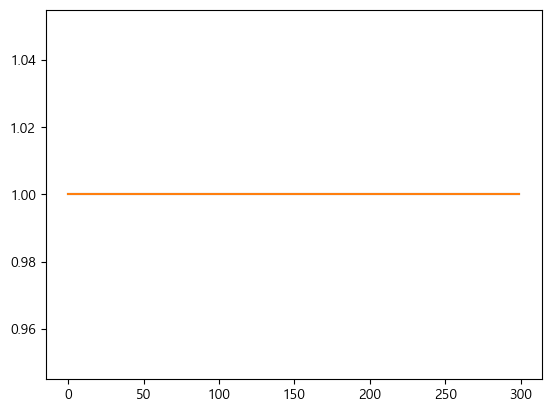

In [163]:
plt.plot(train_score)
plt.plot(test_score)
plt.show()

In [167]:
# 원핫인코딩
target = [] # p,e
data = []
attr_list = []
for row_index,row in df.iterrows(): # df.iterrow() : index, row를 넘겨줌
     target.append(row.loc[0]) # row 1행, row[0][0]
     row_data =[]  # 100000000 원핫인코딩
     for col,v in enumerate(row.loc[1:]): # x s n t p f x 
          if row_index == 0:
               attr = {"dic":{},"cnt":0} # 컬럼 새로운 값이 몇 번 나왔는지
               attr_list.append(attr)
          else:
               attr = attr_list[col] # 0,1,2,3,4,5,,,,,,,,21
          d = [0]*12 
          if v in attr['dic']:     
               idx = attr['dic'][v] #idx = 0 
          else:
               idx = attr['cnt']     # idx = 0
               attr['dic'][v] = idx  # x:0
               attr['cnt'] += 1      # {"dic ":{x:0},"cnt":1}
          d[idx] = 1 #  d = [0]*12 여기에 1이 들어감
          row_data += d # 원핫인코딩 시작 d=[1,0,0,0,0...,0] ->22번
     
     print(row_index,":",row_data) 
     # if row_index == 3:
     #      raise Exception("중간 종료")
     data.append(row_data)

0 : [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
1 : [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 

In [ ]:
df[1].value_counts()

1
x    3655
f    3152
k     828
b     452
s      32
c       4
Name: count, dtype: int64

In [168]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
     data,target,test_size = 0.2, random_state=42
)

In [171]:
from sklearn.tree import DecisionTreeClassifier
df = DecisionTreeClassifier(max_depth=3,random_state=42)
df.fit(train_input, train_target)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [181]:
print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

c:\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


ValueError: X has 264 features, but DecisionTreeClassifier is expecting 117 features as input.

In [182]:
for i ,row in enumerate(df[1:]):
     t = pd.get_dummies(df.iloc[:,i],dtype=float)
     one_hotencoding = pd.concat([one_hotencoding,t],axis=1)

TypeError: 'DecisionTreeClassifier' object is not subscriptable